# Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

new_df = pd.read_csv("/content/drive/MyDrive/Thyroid_ML_Project/Exploration/numericalDF.csv")
new_df.head(7)

,Unnamed: 0,age,sex,query_hyperthyroid,TSH,T3,TT4,T4U,FTI,target
0,0,29.0,0,0,0.300000,2.010773,105.497565,0.967297,110.941312,0.0
1,1,29.0,0,0,1.600000,1.900000,128.000000,0.967297,110.941312,0.0
2,2,41.0,0,1,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
3,3,36.0,0,0,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
4,4,60.0,0,0,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
5,5,77.0,0,0,5.500684,2.010773,105.497565,0.967297,110.941312,0.0
6,6,28.0,0,0,0.700000,2.600000,116.000000,0.967297,110.941312,0.0


In [3]:
new_df.drop('Unnamed: 0', axis=1, inplace=True)


In [4]:
new_df.target.value_counts()

,count
target,
0.0,6553
1.0,6553
2.0,6553


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19659 entries, 0 to 19658
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 19659 non-null  float64
 1   sex                 19659 non-null  int64  
 2   query_hyperthyroid  19659 non-null  int64  
 3   TSH                 19659 non-null  float64
 4   T3                  19659 non-null  float64
 5   TT4                 19659 non-null  float64
 6   T4U                 19659 non-null  float64
 7   FTI                 19659 non-null  float64
 8   target              19659 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


# Random Forest

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
X = new_df.drop('target', axis=1)
y = new_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=56,max_depth=4,max_features='sqrt')

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test,y_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.982895657150124
0.9799084435401831
0.9799084435401831
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1293
         1.0       0.99      0.99      0.99      1315
         2.0       0.97      0.99      0.98      1324

    accuracy                           0.98      3932
   macro avg       0.98      0.98      0.98      3932
weighted avg       0.98      0.98      0.98      3932



In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.061291963377416075

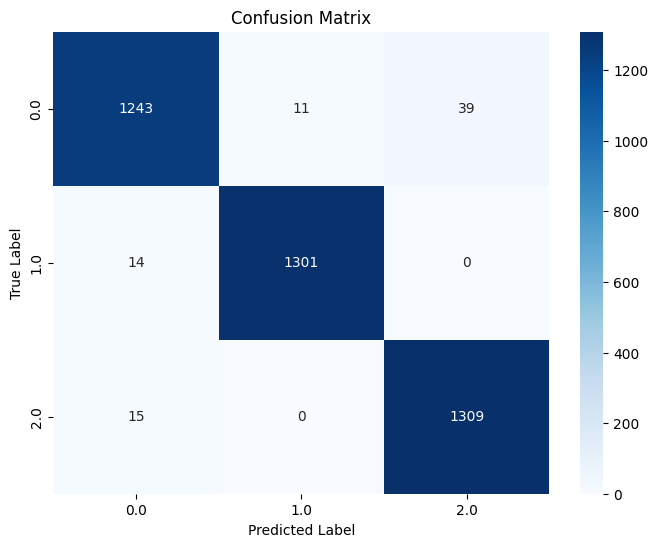

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0.0, 1.0,2.0])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0.0, 1.0,2.0], yticklabels=[0.0, 1.0,2.0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
class_labels = {
    0.0: "no thyroid",
    1.0: "hypothyroid",
    2.0: "hyperthyroid"
}

In [12]:
models = {
    "Random Forest": rf_model
}

# Test data: a list of test instances
user_data_list = [
                  #Hypothyroid
    [[55,0,0,10.5,70,3.5,0.8,0.7]],
    [[50,0,0,10,60,4,0.8,3]],
                  #No thyroid
    [[45,1,0,1.8,70,6.2,0.6,1.6]],
                  #Hyperthyroid
    [[30,1,1,0.02,250,16,1.4,1.4]]
    # Add more test instances here
]

# Iterate through each user data and make predictions
for user_data in user_data_list:
    print(f"Testing on data: {user_data}")
    for model_name, model in models.items():
        user_data1=pd.DataFrame(user_data, columns=['age', 'sex', 'query_hyperthyroid', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'])
        prediction = model.predict(user_data1)
        class_label = class_labels[prediction[0]]
        print(f"{model_name} Prediction: {prediction[0]} - {class_label}")
    print("\n")

Testing on data: [[55, 0, 0, 10.5, 70, 3.5, 0.8, 0.7]]
Random Forest Prediction: 1.0 - hypothyroid


Testing on data: [[50, 0, 0, 10, 60, 4, 0.8, 3]]
Random Forest Prediction: 1.0 - hypothyroid


Testing on data: [[45, 1, 0, 1.8, 70, 6.2, 0.6, 1.6]]
Random Forest Prediction: 0.0 - no thyroid


Testing on data: [[30, 1, 1, 0.02, 250, 16, 1.4, 1.4]]
Random Forest Prediction: 2.0 - hyperthyroid




In [ ]:
import pickle

# Save the models
pickle.dump(rf_model, open('rf_Grid.pkl', 'wb'))